In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.svm import SVC

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, precision_score, recall_score, plot_roc_curve, roc_curve
import scikitplot as skplt
from collections import Counter

In [17]:
df = pd.read_csv('winequality-red.csv')

In [18]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


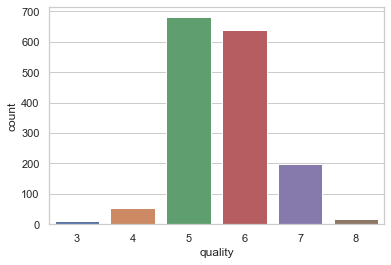

In [19]:
sns.countplot(x=df.quality);

In [20]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [21]:
df["good"] = 0
df.loc[df["quality"]>=6,"good"] = 1

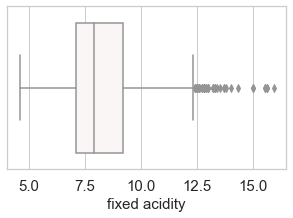

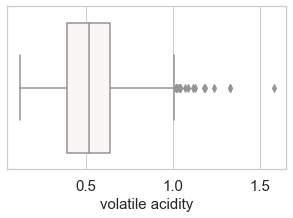

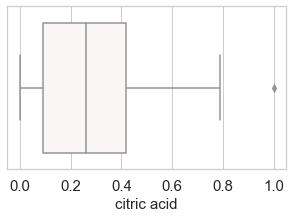

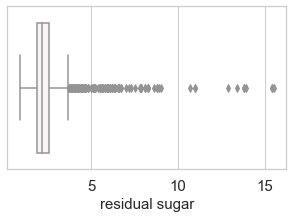

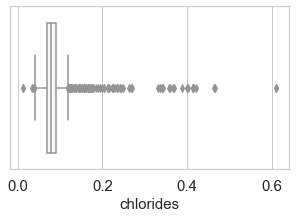

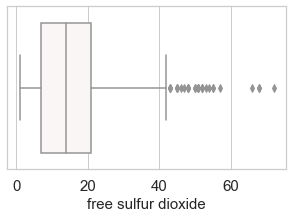

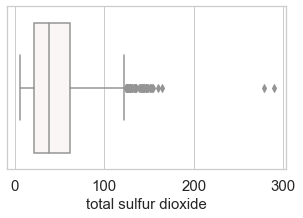

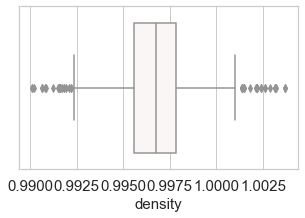

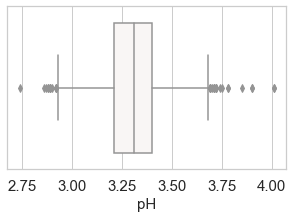

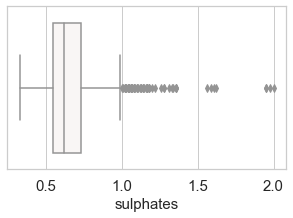

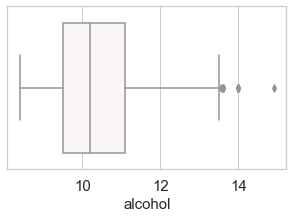

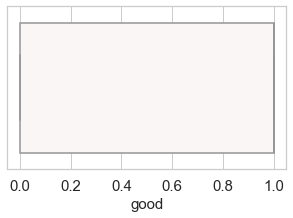

In [22]:
# Boxploty

sns.set_theme(style="whitegrid")

list_columns = list(df.drop("quality", axis=1).columns)

for column in list_columns:
    f, ax = plt.subplots(figsize=(5, 3))
    sns.boxplot(x=df[column], palette="vlag")
    ax.set_xlabel(column,fontsize=15)
    ax.tick_params(labelsize=15);

### Podział na zbiór treningowy i testowy

In [23]:
# Podział na zbiór treningowy i testowy

X = df.drop(columns= ["quality","good"], axis=1)
y = df.good

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = df.good, random_state=0)
y_train.value_counts()

1    598
0    521
Name: good, dtype: int64

### Usuwanie outlier'ów

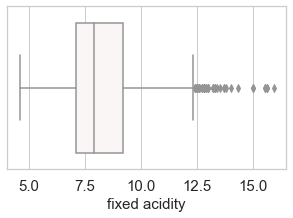

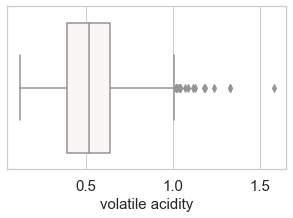

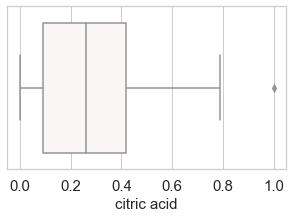

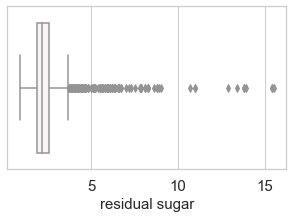

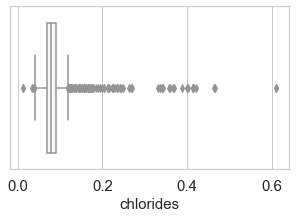

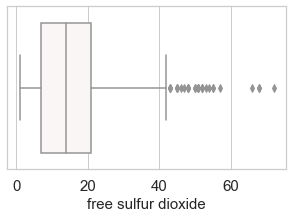

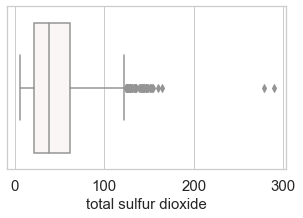

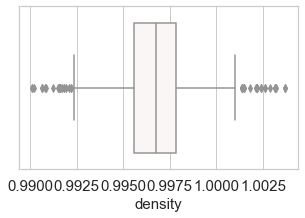

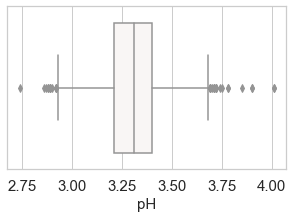

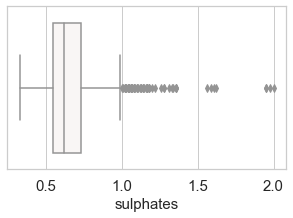

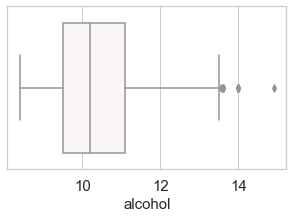

In [26]:
# Boxploty przed usunięciem outlier'ów

sns.set_theme(style="whitegrid")

list_columns_comb = list(X.columns)

for column in list_columns_comb:
    f, ax = plt.subplots(figsize=(5, 3))
    sns.boxplot(x=X[column], palette="vlag")
    ax.set_xlabel(column,fontsize=15)
    ax.tick_params(labelsize=15);

In [27]:
# Usuwanie outlier'ów z zestawu treningowego

def drop_outliers(dff, column):
    iqr = np.percentile(dff[column], 75) - np.percentile(dff[column], 25)
    dff.drop(dff[dff[column] < np.percentile(dff[column], 25) - 3.0 * iqr].index, inplace=True)
    dff.drop(dff[dff[column] > np.percentile(dff[column], 75) + 3.0 * iqr].index, inplace=True)
    return dff

In [28]:
df_train = pd.concat([X_train, y_train], axis=1)
df_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good
121,8.8,0.55,0.04,2.2,0.119,14.0,56.0,0.99620,3.21,0.60,10.9,1
369,9.4,0.27,0.53,2.4,0.074,6.0,18.0,0.99620,3.20,1.13,12.0,1
1598,6.0,0.31,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,1
1497,6.9,0.74,0.03,2.3,0.054,7.0,16.0,0.99508,3.45,0.63,11.5,1
1173,7.6,0.36,0.31,1.7,0.079,26.0,65.0,0.99716,3.46,0.62,9.5,1


In [29]:
df_train.shape

(1119, 12)

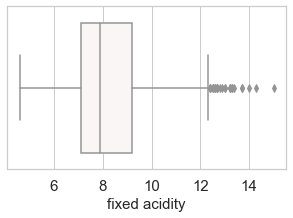

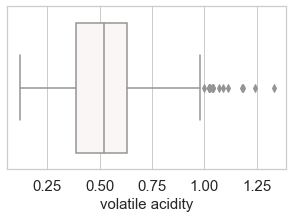

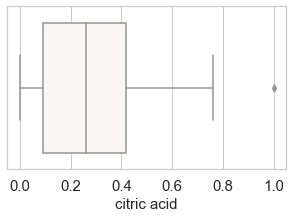

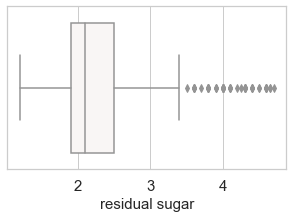

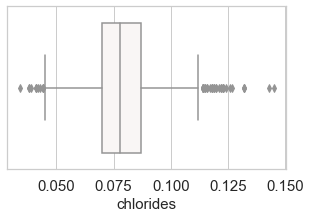

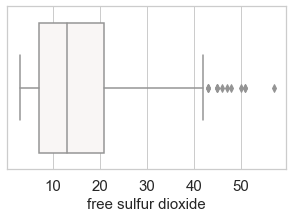

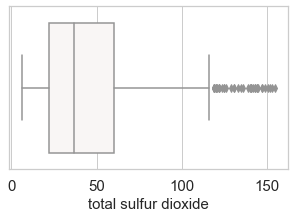

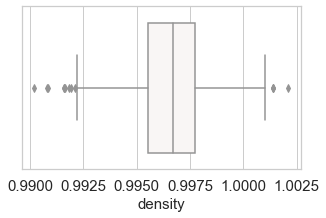

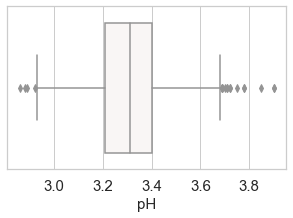

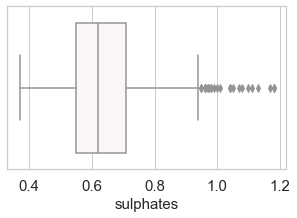

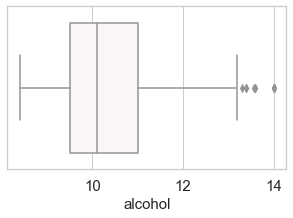

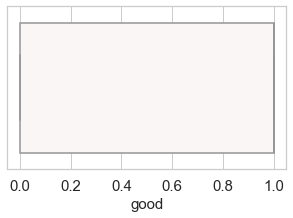

In [30]:
# Boxploty po usunięciu outlier'ów

for column in list_columns:
    drop_outliers(df_train, column=column)
    
    f, ax = plt.subplots(figsize=(5, 3))
    sns.boxplot(x=df_train[column], palette="vlag")
    ax.set_xlabel(column,fontsize=15)
    ax.tick_params(labelsize=15);

In [31]:
df_train.shape

(1010, 12)

In [32]:
X_train_outlier = df_train.drop("good", axis=1)
y_train_outlier = df_train.good

y_train_outlier.value_counts()

1    544
0    466
Name: good, dtype: int64

In [34]:
# Sprawdzenie przed usunięciem

y_test.value_counts()

1    257
0    223
Name: good, dtype: int64

In [35]:
df_test = pd.concat([X_test, y_test], axis=1)
df_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good
208,7.8,0.440,0.28,2.7,0.100,18.0,95.0,0.99660,3.22,0.67,9.4,0
835,7.6,0.665,0.10,1.5,0.066,27.0,55.0,0.99655,3.39,0.51,9.3,0
1091,7.9,0.340,0.42,2.0,0.086,8.0,19.0,0.99546,3.35,0.60,11.4,1
443,10.0,0.440,0.49,2.7,0.077,11.0,19.0,0.99630,3.23,0.63,11.6,1
1587,5.8,0.610,0.11,1.8,0.066,18.0,28.0,0.99483,3.55,0.66,10.9,1


In [36]:
df_test.shape

(480, 12)

In [37]:
for column in list_columns:
    drop_outliers(df_test, column=column)

In [38]:
# Sprawdzenie po usunięciu

df_test.shape

(422, 12)

In [39]:
X_test_outlier = df_test.drop("good", axis=1)
y_test_outlier = df_test.good

y_test_outlier.value_counts()

1    231
0    191
Name: good, dtype: int64

### Normalizacja

In [40]:
# Normalizacja zestawu treningowego do rozkładu normalnego, wyznaczenie wartości średnich i odchyleń standardowych
# https://stats.stackexchange.com/questions/174823/how-to-apply-standardization-normalization-to-train-and-testset-if-prediction-i

scaler = StandardScaler()
scaler.fit(X_train_outlier)

X_train_std = scaler.transform(X_train_outlier)

print(scaler.mean_, scaler.scale_)

[ 8.29881188  0.52216337  0.26156436  2.26415842  0.07922871 15.6039604
 44.50990099  0.99665879  3.31935644  0.63970297 10.41008251] [1.69794243e+00 1.71880393e-01 1.90336670e-01 5.93856781e-01
 1.57818095e-02 9.89647323e+00 3.03845307e+01 1.77547610e-03
 1.50693715e-01 1.29466961e-01 1.05129672e+00]


In [41]:
# Normalizacja zestawu testowego do rozkładu normalnego z wykorzystaniem wartości średnich i odch. std z zestawu treningowego

X_test_std = scaler.transform(X_test_outlier)

## SVC

In [51]:
SVC?

In [52]:
parameters_SVC = {
    "C": [0.1, 1, 10, 50, 100],
    "gamma": [0.0001, 0.0005, 0.001, 0.005, 'auto'], 
    "kernel": ('linear','poly','rbf', 'sigmoid'),
    "degree": [2,3,4]
}


model_SVC = SVC(probability=True)
model_SVC_with_best_params = GridSearchCV(estimator=model_SVC, param_grid=parameters_SVC, scoring='f1_macro', cv=5)
model_SVC_with_best_params.fit(X_train_std,y_train_outlier)
model_SVC_best_params = model_SVC_with_best_params.best_params_

In [53]:
model_SVC_best_params

{'C': 1, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}

In [54]:
predictions_SVC = model_SVC_with_best_params.predict(X_test_std)

              precision    recall  f1-score   support

           0      0.728     0.812     0.767       191
           1      0.828     0.749     0.786       231

    accuracy                          0.777       422
   macro avg      0.778     0.780     0.777       422
weighted avg      0.782     0.777     0.778       422

Overall Accuracy: 0.7772511848341233
Overall Precision: 0.7777253633443404
Overall Recall: 0.7802180367625393

Confusion matrix: 
 [[155  36]
 [ 58 173]]


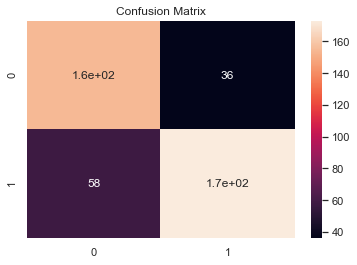

In [55]:
cm = confusion_matrix(y_test_outlier, predictions_SVC)
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix")
    
acc = accuracy_score(y_test_outlier, predictions_SVC)
pre = precision_score(y_test_outlier, predictions_SVC, average="macro")
rec = recall_score(y_test_outlier, predictions_SVC, average="macro")
# Prediction Report
print(classification_report(y_test_outlier, predictions_SVC, digits=3))
print("Overall Accuracy:", acc)
print("Overall Precision:", pre)
print("Overall Recall:", rec)
print("\nConfusion matrix: \n", confusion_matrix(y_test_outlier, predictions_SVC))

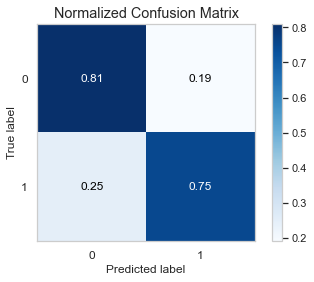

In [56]:
skplt.metrics.plot_confusion_matrix(y_test_outlier, y_pred=predictions_SVC, normalize=True)
plt.show()

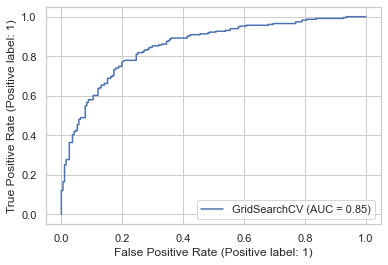

In [57]:
plot_roc_curve(model_SVC_with_best_params, X_test_std, y_test_outlier)
pass